In [1]:
import pybullet as p

import pybullet_data


p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# First, let's make sure we start with a fresh new simulation.
# Otherwise, we can keep adding objects by running this cell over again.
p.resetSimulation()

In [75]:
p.resetSimulation()

In [76]:


# Load our simulation floor plane at the origin (0, 0, 0).
ground = p.loadURDF('plane.urdf')

# Load an R2D2 droid at the position at 0.5 meters height in the z-axis.
r2d2 = p.loadURDF('1/bittle.urdf', [0, 0, 0.62],flags=p.URDF_USE_SELF_COLLISION)


# We can check the number of bodies we have in the simulation.
p.getNumBodies()

# Capture initial position
initial_position, _ = p.getBasePositionAndOrientation(r2d2)
initial_x, initial_y, _ = initial_position



In [77]:
# p.resetBasePositionAndOrientation(r2d2,[0,0,0.6],[0,0,0,1])
# for i in range(0,p.getNumJoints(r2d2)):
#             p.resetJointState(bodyUniqueId=1, jointIndex=i, targetValue = 0)

In [78]:
# First let's define a class for the JointInfo.
from dataclasses import dataclass

@dataclass
class Joint:
  index: int
  name: str
  type: int
  gIndex: int
  uIndex: int
  flags: int
  damping: float
  friction: float
  lowerLimit: float
  upperLimit: float
  maxForce: float
  maxVelocity: float
  linkName: str
  axis: tuple
  parentFramePosition: tuple
  parentFrameOrientation: tuple
  parentIndex: int

  def __post_init__(self):
    self.name = str(self.name, 'utf-8')
    self.linkName = str(self.linkName, 'utf-8')

# Let's analyze the R2D2 droid!
print(f"r2d2 unique ID: {r2d2}")
# for i in range(p.getNumJoints(r2d2)):
#   joint = Joint(*p.getJointInfo(r2d2, i))
#   print(joint)

r2d2 unique ID: 1


In [79]:
p.getNumJoints(r2d2)

12

In [80]:
link_name_to_index = {p.getBodyInfo(r2d2)[0].decode('UTF-8'):-1,}
        
for id in range(p.getNumJoints(r2d2)):
    name = p.getJointInfo(r2d2, id)[12].decode('UTF-8')
    link_name_to_index[name] = id
link_name_to_index, link_name_to_index.values()

({'base-frame-link': -1,
  'battery-link': 0,
  'cover-link': 1,
  'left-back-shoulder-link': 2,
  'left-back-knee-link': 3,
  'left-front-shoulder-link': 4,
  'left-front-knee-link': 5,
  'mainboard_link': 6,
  'imu_link': 7,
  'right-back-shoulder-link': 8,
  'right-back-knee-link': 9,
  'right-front-shoulder-link': 10,
  'right-front-knee-link': 11},
 dict_values([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

In [81]:
p.changeVisualShape(r2d2,-1,rgbaColor=[1,0,0,1])
p.changeVisualShape(r2d2,0,rgbaColor=[0.5,1,0,1])
p.changeVisualShape(r2d2,1,rgbaColor=[1,1,0,1])
p.changeVisualShape(r2d2,6,rgbaColor=[0,0.3,0.8,1])

p.changeVisualShape(r2d2,2,rgbaColor=[0,1,0,0.7])
p.changeVisualShape(r2d2,4,rgbaColor=[0,1,0,0.7])

p.changeVisualShape(r2d2,8,rgbaColor=[0,1,0,1])
p.changeVisualShape(r2d2,10,rgbaColor=[0,1,0,1])

p.changeVisualShape(r2d2,3,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,5,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,9,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,11,rgbaColor=[0.5,0.5,0.5,0.89])






In [82]:
link_name_to_index.values()

dict_values([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [83]:
from numpy import random


# MODEL DEFINING

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU instead.")

Using GPU: NVIDIA GeForce GTX 1650


In [85]:
# class QuadrupedNN(nn.Module):
#     def __init__(self, input_size, output_size):
#         super(QuadrupedNN, self).__init__()
#         # Define the layers of the neural network
#         self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, 32)
#         self.fc5 = nn.Linear(32, output_size)

#     def forward(self, x):
#         # Forward pass through the network
#         x = F.relu(self.fc1(x))  # Activation function for first layer
#         x = F.relu(self.fc2(x))  # Activation function for second layer
#         x = F.relu(self.fc3(x))  # Activation function for second layer
#         x = F.relu(self.fc4(x))  # Activation function for second layer
#         x = self.fc5(x)          # No activation for the output layer
#         return x


# class QuadrupedLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers=2):
#         super(QuadrupedLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         # x should be of shape (batch_size, sequence_length, input_size)
#         # Initialize hidden and cell states
#         h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
#         c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

#         # Forward propagate LSTM
#         out, _ = self.lstm(x, (h0, c0))

#         # Decode the hidden state of the last time step
#         out = self.fc(out[:, -1, :])
#         return out



class QuadrupedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(QuadrupedLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # More fully connected layers
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x should be of shape (batch_size, sequence_length, input_size)
        # Initialize hidden and cell states
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out
class CustomSquash(nn.Module):
    def forward(self, x):
        # Squash the output to be in the range [-0.5, 0.5]
        return 8.000005* torch.tanh(x)

class QuadrupedTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, nhead=4, dropout=0.5):
        super(QuadrupedTransformer, self).__init__()
        
        self.embedding = nn.Linear(input_size, hidden_size)
        transformer_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
        self.custom_activation = CustomSquash()

    
    def forward(self, x):
        # x should be of shape (batch_size, sequence_length, input_size)
        x = self.embedding(x) # Transform to hidden size

        # The Transformer expects input of shape (sequence_length, batch_size, hidden_size)
        x = x.permute(1, 0, 2)
        x = torch.tanh(x)

        # Forward propagate through the Transformer
        out = self.transformer_encoder(x)

        # Decode the hidden state of the last time step
        out = self.fc(out[-1, :, :])
        out = self.custom_activation(out)
        return out

In [86]:

# Observations
position, orientation = p.getBasePositionAndOrientation(r2d2)
x, y, z = position
roll, pitch, yaw = p.getEulerFromQuaternion(orientation)
joint_states = p.getJointStates(r2d2, range(p.getNumJoints(r2d2)))
joint_positions = [state[0] for state in joint_states]  # Joint positions
joint_velocities = [0 for state in joint_states]  # Joint velocities
contact_points = len(p.getContactPoints(bodyA=ground, bodyB=r2d2))

joint_torques = [state[3] for state in joint_states]  # Joint torques
linear_vel, angular_vel = p.getBaseVelocity(r2d2)

# Combine all observations
observations = [x, y, z, roll, pitch, yaw] + joint_positions + joint_velocities + [contact_points] +list(linear_vel)+list(angular_vel)+list(joint_torques)


input_size = len(observations)  # This should be the length of your observation vector
output_size = p.getNumJoints(r2d2) 

model = QuadrupedTransformer(input_size,4, output_size)

In [87]:
joint_velocities

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [88]:
data_log = {}

In [89]:
import random
from collections import namedtuple, deque
import itertools

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)
        self.sequence_length = 4  # Define the length of each sequence

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        sequences = []
        for _ in range(batch_size):
            while True:
                start = random.randint(0, len(self.memory) - self.sequence_length)
                sequence = list(itertools.islice(self.memory, start, start + self.sequence_length))
                # Check if sequence crosses episode boundary
                if not any(t.next_state is None for t in sequence):
                    sequences.append(sequence)
                    break
        return sequences

    def __len__(self):
        return len(self.memory)

replay_memory = ReplayMemory(capacity=100000)  # Adjust the capacity as needed
batch_size = 256  # Batch size for training

In [90]:
p.setPhysicsEngineParameter(fixedTimeStep=1/15)
# Define the maximum velocity limit
max_velocity_limit = 20.354# Adjust as needed

In [91]:
loss_data=[]
reward_data = []
jointdata=[]

In [ ]:
import numpy as np
#SIM
rec=300
model = model.to(device)
def calculate_reward(position, orientation, joint_states, linear_vel, angular_vel, initial_position, initial_orientation,contact_points):
    # Constants
    HEIGHT_TARGET = 30  # Target height for the robot
    HEIGHT_WEIGHT = 115.0  # Weight for height reward
    ORIENTATION_WEIGHT = 10.0  # Weight for orientation penalty
    POSITION_WEIGHT = 15.0 # Weight for position penalty
    MOVEMENT_WEIGHT =8.0  # Weight for movement penalty
    CONTACT_POINTS_PENALTY_WEIGHT = 1000.0  # Weight for contact points reward/penalty


    x, y, z = position
    initial_x, initial_y, _ = initial_position

    # Height Reward
    height_reward = -HEIGHT_WEIGHT * abs(z - HEIGHT_TARGET)

    # Orientation Penalty
    orientation_error = np.linalg.norm(np.array(orientation) - np.array(initial_orientation))
    orientation_penalty = -ORIENTATION_WEIGHT * orientation_error

    # Position Penalty
    position_penalty = -POSITION_WEIGHT * (abs(x - initial_x) + abs(y - initial_y))

    # Movement Penalty
    joint_velocities = [state[1] for state in joint_states]
    movement_penalty = -MOVEMENT_WEIGHT * (np.linalg.norm(joint_velocities) + np.linalg.norm(linear_vel) + np.linalg.norm(angular_vel))


   # Contact Points Penalty
    contact_points_deviation = abs(contact_points - 4)
    contact_points_penalty = -CONTACT_POINTS_PENALTY_WEIGHT * contact_points_deviation
    
    # Total Reward
    total_reward = height_reward + orientation_penalty + position_penalty + movement_penalty

    return total_reward

# Set the gravity to Earth's gravity.
p.setGravity(0, 0, -9.807)



initial_orientation = p.getQuaternionFromEuler([0, 0, 0]) 

# Define contact bonus
contact_bonus = 0.2 # Example value, adjust as needed

# Run the simulation for a fixed amount of steps.
observations = []


# Initialize training variables
train = True  # Set this to True or False
training_data = []  # To store (observation, action, reward)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Example optimizer

t=0
tt=2000
#start sim
while True :
    t+=1
    if t==tt:
        p.resetBasePositionAndOrientation(r2d2, initial_position, initial_orientation)

        for joint in  range(p.getNumJoints(r2d2)):
            p.resetJointState(r2d2, joint, targetValue=0, targetVelocity=0)
        t=0
        continue



    ##OBSERVATIONS
    
    # Observations
    position, orientation = p.getBasePositionAndOrientation(r2d2)
    x, y, z = position
    roll, pitch, yaw = p.getEulerFromQuaternion(orientation)
    joint_states = p.getJointStates(r2d2, range(p.getNumJoints(r2d2)))
    joint_positions = [state[0] for state in joint_states]  # Joint positions
    joint_velocities = [state[1] for state in joint_states]  # Joint velocities
    contact_points = len(p.getContactPoints(bodyA=ground, bodyB=r2d2))
    linear_vel, angular_vel = p.getBaseVelocity(r2d2)

    joint_torques = [state[3] for state in joint_states]  # Joint torques
    
    # Combine all observations
    observations = [x, y, z, roll, pitch, yaw] + joint_positions + joint_velocities + [contact_points] + list(linear_vel) +list(angular_vel) +list(joint_torques)
    # print(contact_points)
    # # Convert observations to a PyTorch tensor
    # observations_tensor = torch.tensor(observations, dtype=torch.float32)


    observations_tensor = torch.tensor(observations, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    observations_tensor = observations_tensor.to(device)
    actions = model(observations_tensor).detach().cpu().numpy()[0]


    

    for i in range(p.getNumJoints(r2d2)):
       
        # Ensure actions are in the correct format and range for your specific robot

        # action = np.clip(scaled_actions[i], -SC, SC)
        # joint_action = np.clip(scaled_actions[i], -max_velocity_limit, max_velocity_limit) 
        # if i==8:
        #     jointdata.append(joint_action)
        # print(action)
        p.setJointMotorControl2(bodyIndex=1,jointIndex=i, controlMode=p.VELOCITY_CONTROL, targetVelocity=actions[i])



    
    # next Observations
    position, orientation = p.getBasePositionAndOrientation(r2d2)
    x, y, z = position
    roll, pitch, yaw = p.getEulerFromQuaternion(orientation)
    joint_states = p.getJointStates(r2d2, range(p.getNumJoints(r2d2)))
    joint_positions = [state[0] for state in joint_states]  # Joint positions
    joint_velocities = [state[1] for state in joint_states]  # Joint velocities
    contact_points = len(p.getContactPoints(bodyA=ground, bodyB=r2d2))
    linear_vel, angular_vel = p.getBaseVelocity(r2d2)
    joint_torques = [state[3] for state in joint_states]  # Joint torques
    
    # Combine all observations
    next_observations = [x, y, z, roll, pitch, yaw] + joint_positions + joint_velocities + [contact_points] + list(linear_vel) +list(angular_vel) +list(joint_torques)

    # # Convert observations to a PyTorch tensor
    # next_observations_tensor = torch.tensor(next_observations, dtype=torch.float32)
    
    
    reward = calculate_reward(position, orientation, joint_states, linear_vel, angular_vel, initial_position, initial_orientation,contact_points)

    if t % 1 == 0:
            reward_data.append(contact_points)
    # if contact_points == 4:  # Assuming 4 is the desired number of contact points
    #     reward += contact_bonus  # Balance reward
    # else:  # Assuming 4 is the desired number of contact points
    #     reward -= 0.02  # Balance reward
    
    # Store data for training
    if train:
        # Convert observations and next_observations to PyTorch tensors
        observations_tensor = torch.tensor(observations, dtype=torch.float32).unsqueeze(0).to(device)
        next_observations_tensor = torch.tensor(next_observations, dtype=torch.float32).unsqueeze(0).to(device)
        actions_tensor = torch.tensor(actions, dtype=torch.float32).unsqueeze(0).to(device)
        reward_tensor = torch.tensor([reward], dtype=torch.float32).to(device)
    
        # Store the transition in replay memory
        replay_memory.push(observations_tensor, actions_tensor, next_observations_tensor, reward_tensor)


    # Perform training every 250 steps
    if train and len(replay_memory) >= batch_size and t%1500==0:
        print('training')
        gamma = 0.99
        sequences = replay_memory.sample(batch_size)
        for sequence in sequences:

            
            batch = Transition(*zip(*sequence))
        
            # Concatenate the batch elements into separate tensors
            state_batch = torch.cat(batch.state).unsqueeze(1)
            action_batch = torch.cat(batch.action)
            reward_batch = torch.cat(batch.reward)
            next_state_batch = torch.cat(batch.next_state).unsqueeze(1)
        
            # Predict current Q-values
            # print(state_batch.shape,reward_batch.shape)
            current_q_values = model(state_batch)
    
    
            
        
            # Predict next Q-values
            next_q_values = model(next_state_batch)
        
            # Average next Q-values across joints
            average_next_q_values = torch.mean(next_q_values, dim=1)
        
            # Calculate TD target
            td_target = reward_batch + gamma * average_next_q_values
        
            # Compute loss
            # print(current_q_values)
            loss = F.mse_loss(current_q_values, td_target.unsqueeze(1))
    
            if t % 100 == 0:
                loss_data.append(loss.detach().cpu().item())
    
        
            # Perform optimization step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    p.stepSimulation()


training


C:\Users\91917\AppData\Local\Temp\ipykernel_20236\1117010371.py:191: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(current_q_values, td_target.unsqueeze(1))


training
training
training
training
training
training
training


In [ ]:
jointdata

In [ ]:
import matplotlib.pyplot as plt

plt.plot(jointdata)
plt.show()

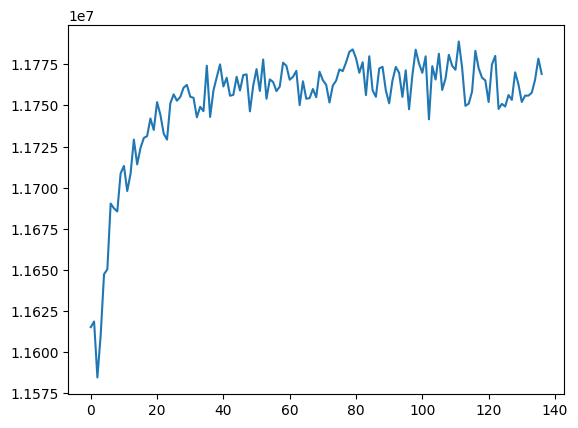

In [691]:
plt.plot(loss_data)
plt.show()

## Replay memory

$ e_t=(s_t,a_t,r_{t+1},s_{t+1}) $

This tuple contains the state of the environment , the action taken from state , the reward given to the agent at time as a result of the previous state-action pair , and the next state of the environment . This tuple indeed gives us a summary of the agent's experience at time . 

In [ ]:
# import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# import torchvision.transforms as T


# env = gym.make('CartPole-v0').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


## DQN

In [ ]:
class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

In [ ]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
# init_screen = get_screen()
screen_height, screen_width =1,12

# # Get number of actions from gym action space
n_actions = 12

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)

In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

## TRAINING LOOP

In [ ]:
num_episodes = 50


for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()

    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen


    for t in count():

        # Select and perform an action
        action = select_action(state)
        _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None
            

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())


In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 320
height = 300
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],
        distance=2,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)
width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

In [ ]:
# p.changeVisualShape(r2d2,-1,rgbaColor=[1,1,1,0])